In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import folium
from geopy.distance import distance

In [26]:
if not 'cell_has_run' in globals():
    from google.colab import files
    uploaded = files.upload()
    cell_has_run = True

In [27]:
typhoon_data = pd.read_csv('/content/typhoon_data.csv', index_col = [0])
typhoon_data.head()

,International number ID,year,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage
0,5101,1951,2,19,6,Tropical Depression,200,1385,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,5101,1951,2,19,12,Tropical Depression,200,1385,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,5101,1951,2,19,18,Tropical Depression,230,1421,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,5101,1951,2,20,0,Tropical Cyclone of TS intensity or higher,250,1460,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,5101,1951,2,20,6,Tropical Cyclone of TS intensity or higher,276,1506,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [28]:
typhoon_data.columns

Index(['International number ID', 'year', 'month', 'day', 'hour', 'grade',
       'Latitude of the center', 'Longitude of the center', 'Central pressure',
       'Maximum sustained wind speed',
       'Direction of the longest radius of 50kt winds or greater',
       'The longeast radius of 50kt winds or greater',
       'The shortest radius of 50kt winds or greater',
       'Direction of the longest radius of 30kt winds or greater',
       'The longeast radius of 30kt winds or greater',
       'The shortest radius of 30kt winds or greater',
       'Indicator of landfall or passage'],
      dtype='object')

In [29]:
typhoon_data.nunique()

International number ID                                     1881
year                                                          72
month                                                         12
day                                                           31
hour                                                          24
grade                                                          7
Latitude of the center                                       604
Longitude of the center                                      875
Central pressure                                             125
Maximum sustained wind speed                                  22
Direction of the longest radius of 50kt winds or greater      10
The longeast radius of 50kt winds or greater                  42
The shortest radius of 50kt winds or greater                  35
Direction of the longest radius of 30kt winds or greater      10
The longeast radius of 30kt winds or greater                  60
The shortest radius of 30

In [30]:
typhoon_info = pd.read_csv('/content/typhoon_info.csv', index_col = [0])
typhoon_info.head()

,International number ID,Tropical cyclone number ID,Flag of the last data line,Difference between the time of the last data and the time of the final analysis,Name,Latest Revision
0,5101,NaN,Dissipation,6,,1990-10-17
1,5102,NaN,Dissipation,6,GEORGIA,2013-03-19
2,5103,NaN,Dissipation,6,HOPE,1989-06-01
3,5104,NaN,Dissipation,6,IRIS,2013-03-19
4,5105,NaN,Going out,0,JOAN,1991-07-16


In [31]:
typhoon_info.columns

Index(['International number ID', 'Tropical cyclone number ID',
       'Flag of the last data line',
       'Difference between the time of the last data and the time of the final analysis',
       'Name', 'Latest Revision'],
      dtype='object')

In [32]:
typhoon_info.nunique()

International number ID                                                            1881
Tropical cyclone number ID                                                           45
Flag of the last data line                                                            2
Difference between the time of the last data and the time of the final analysis       3
Name                                                                                497
Latest Revision                                                                     322
dtype: int64

In [33]:
typhoon_data.dtypes

International number ID                                       int64
year                                                          int64
month                                                         int64
day                                                           int64
hour                                                          int64
grade                                                        object
Latitude of the center                                        int64
Longitude of the center                                       int64
Central pressure                                              int64
Maximum sustained wind speed                                float64
Direction of the longest radius of 50kt winds or greater     object
The longeast radius of 50kt winds or greater                float64
The shortest radius of 50kt winds or greater                float64
Direction of the longest radius of 30kt winds or greater     object
The longeast radius of 30kt winds or greater    

In [34]:
typhoon_data['date'] = pd.to_datetime(typhoon_data[['year', 'month', 'day', 'hour']])
typhoon_data.grade = typhoon_data.grade.astype('category')
typhoon_data.head(2)

,International number ID,year,month,day,hour,grade,Latitude of the center,Longitude of the center,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage,date
0,5101,1951,2,19,6,Tropical Depression,200,1385,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1951-02-19 06:00:00
1,5101,1951,2,19,12,Tropical Depression,200,1385,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1951-02-19 12:00:00


In [35]:
typhoon_data.rename(columns = {
    'International number ID': 'id',
    'Latitude of the center': 'lat',
    'Longitude of the center': 'lon'
}, inplace = True)

In [36]:
typhoon_data.lon /= 10
typhoon_data.lat /= 10

In [37]:
def calc_distance(lat_1, lon_1, lat_2, lon_2):
    return distance((lat_1, lon_1), (lat_2, lon_2)).km

for id, group in typhoon_data.groupby('id'):
    distances = np.vectorize(calc_distance)(
        group.lat[:-1],
        group.lon[:-1],
        group.lat[1:],
        group.lon[1:]
    )
    typhoon_data.loc[group.index, 'distance'] = np.concatenate(([np.nan], distances))

In [38]:
typhoon_data['speed'] = typhoon_data.distance / typhoon_data.date.diff().astype('timedelta64[h]')
typhoon_data.head()

,id,year,month,day,hour,grade,lat,lon,Central pressure,Maximum sustained wind speed,Direction of the longest radius of 50kt winds or greater,The longeast radius of 50kt winds or greater,The shortest radius of 50kt winds or greater,Direction of the longest radius of 30kt winds or greater,The longeast radius of 30kt winds or greater,The shortest radius of 30kt winds or greater,Indicator of landfall or passage,date,distance,speed
0,5101,1951,2,19,6,Tropical Depression,20.0,138.5,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1951-02-19 06:00:00,NaN,NaN
1,5101,1951,2,19,12,Tropical Depression,20.0,138.5,1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1951-02-19 12:00:00,0.000000,0.000000
2,5101,1951,2,19,18,Tropical Depression,23.0,142.1,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1951-02-19 18:00:00,499.438256,83.239709
3,5101,1951,2,20,0,Tropical Cyclone of TS intensity or higher,25.0,146.0,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1951-02-20 00:00:00,454.433324,75.738887
4,5101,1951,2,20,6,Tropical Cyclone of TS intensity or higher,27.6,150.6,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1951-02-20 06:00:00,542.135437,90.355906


In [39]:
typhoon_data.dtypes

id                                                                   int64
year                                                                 int64
month                                                                int64
day                                                                  int64
hour                                                                 int64
grade                                                             category
lat                                                                float64
lon                                                                float64
Central pressure                                                     int64
Maximum sustained wind speed                                       float64
Direction of the longest radius of 50kt winds or greater            object
The longeast radius of 50kt winds or greater                       float64
The shortest radius of 50kt winds or greater                       float64
Direction of the longest 

There is no missing data in our typhoon dataset, except for new distance and speed columns. We are missing exactly one value for each typhoon.

In [40]:
typhoon_data.isnull().sum()

id                                                              0
year                                                            0
month                                                           0
day                                                             0
hour                                                            0
grade                                                           0
lat                                                             0
lon                                                             0
Central pressure                                                0
Maximum sustained wind speed                                25268
Direction of the longest radius of 50kt winds or greater    41416
The longeast radius of 50kt winds or greater                41416
The shortest radius of 50kt winds or greater                41416
Direction of the longest radius of 30kt winds or greater    41416
The longeast radius of 30kt winds or greater                41416
The shorte

In [41]:
typhoon_data.nunique()

id                                                           1881
year                                                           72
month                                                          12
day                                                            31
hour                                                           24
grade                                                           7
lat                                                           604
lon                                                           875
Central pressure                                              125
Maximum sustained wind speed                                   22
Direction of the longest radius of 50kt winds or greater       10
The longeast radius of 50kt winds or greater                   42
The shortest radius of 50kt winds or greater                   35
Direction of the longest radius of 30kt winds or greater       10
The longeast radius of 30kt winds or greater                   60
The shorte

In [42]:
typhoon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68624 entries, 0 to 68623
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   id                                                        68624 non-null  int64         
 1   year                                                      68624 non-null  int64         
 2   month                                                     68624 non-null  int64         
 3   day                                                       68624 non-null  int64         
 4   hour                                                      68624 non-null  int64         
 5   grade                                                     68624 non-null  category      
 6   lat                                                       68624 non-null  float64       
 7   lon                                     

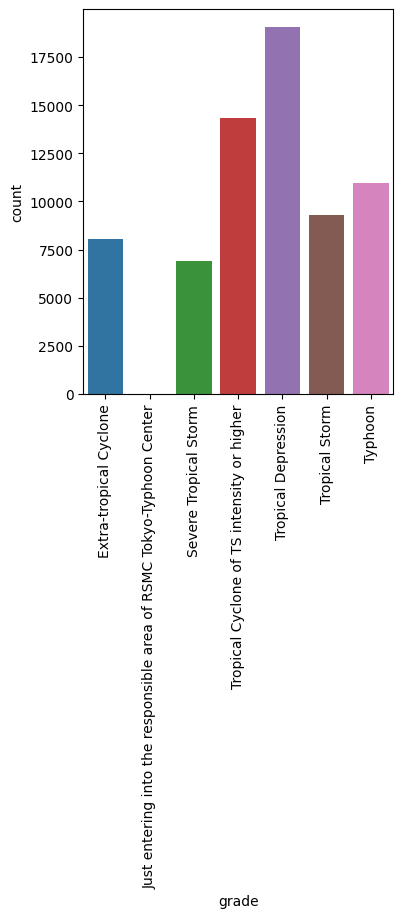

In [44]:
plt.figure(figsize = (4, 5))
sns.countplot(data = typhoon_data, x = 'grade')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

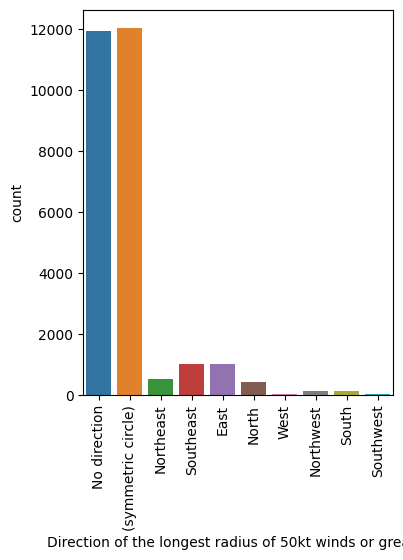

In [45]:
plt.figure(figsize = (4, 5))
sns.countplot(data = typhoon_data, x = "Direction of the longest radius of 50kt winds or greater")
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

## Duration of the longest storms ?

In [ ]:
temp1 = typhoon_data.groupby('id').date.agg(['min', 'max']).diff(axis = 1)['max']
merge1 = pd.merge(typhoon_info[['International number ID', 'Name']], temp1, left_on = 'International number ID', right_index = True)
merge1.rename(columns = {'International number ID': 'id', 'max': 'duration'}, inplace = True)

In [ ]:
merge1.sort_values('duration', ascending = False).head()

,id,Name,duration
583,7207,RITA,22 days 00:00:00
950,8614,WAYNE,21 days 18:00:00
313,6309,BESS,21 days 18:00:00
636,7408,GILDA,21 days 06:00:00
1730,1705,NORU,21 days 00:00:00


## Frequency vs Duration of Measurement of Storms

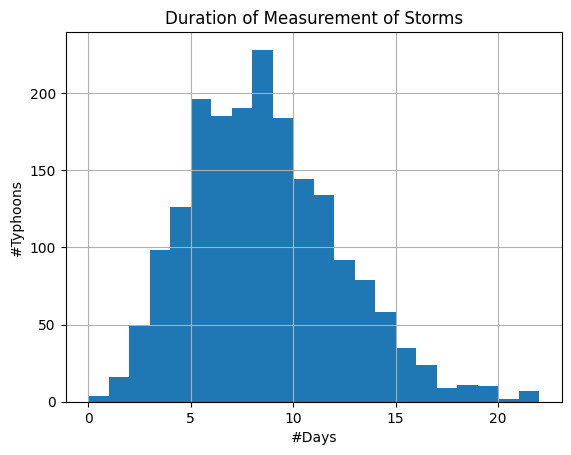

In [ ]:
ax = merge1.duration.astype('timedelta64[D]').hist(bins = 22)
ax.set_title('Duration of Measurement of Storms')
ax.set_ylabel('#Typhoons')
ax.set_xlabel('#Days')
plt.show(ax)

## Types of Typhoons

Different kinds of Typhoons: 

Tropical Depression                                                     19034
Tropical Cyclone of TS intensity or higher                              14326
Typhoon                                                                 10984
Tropical Storm                                                           9311
Extra-tropical Cyclone                                                   8042
Severe Tropical Storm                                                    6895
Just entering into the responsible area of RSMC Tokyo-Typhoon Center       32
Name: grade, dtype: int64


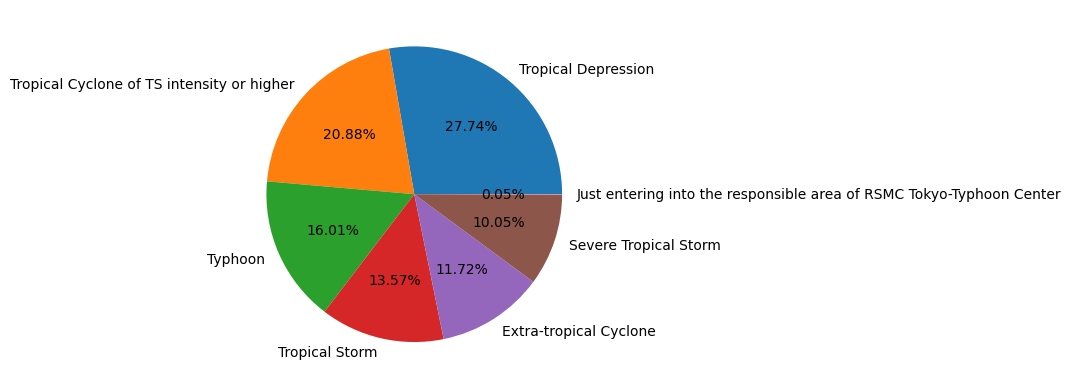

In [ ]:
print('Different kinds of Typhoons: \n')
print(typhoon_data['grade'].value_counts())
plt.pie(typhoon_data['grade'].value_counts(),
        labels = typhoon_data['grade'].value_counts().index,
        autopct = '%1.2f%%')
plt.show()